# Analyzing customer churn

Analyzing churn doesn’t just mean knowing the churn rate: it’s also about figuring out why customers are churning at the rate they are and how to reduce churn. 

## 💾 The data


The data consists of four parts:
- **Customer status**: the status and reason why customers churned
- **Demographics**: demographic data on each customer
- **Contract information**: information on the type of contract
- **Subscription types & charges**: numerical data on how the customer uses his subscription

More information about the data can be found [here](https://assets.datacamp.com/production/repositories/6386/datasets/0d84b751e28911f4a2c51b1a38c0100a55d8037e/Metadata%20Sheet%20-%20Customer%20Churn.pdf).


**Importing the necessary libraries**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Reading the excel file**

In [7]:
data = pd.ExcelFile('Databel - Data.xlsx')
Databel_data = data.parse(header=1,index='Customer ID')
Databel_data.head()

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,Customer Service Calls,Avg Monthly GB Download,Unlimited Data Plan,Extra Data Charges,State,Phone Number,Gender,Age,Under 30,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,0,3,Yes,0,KS,382-4657,Female,35,No,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,0,3,Yes,0,OH,371-7191,Male,49,No,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,0,3,Yes,0,OH,375-9999,Male,51,No,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,0,2,Yes,0,MO,329-9001,Female,41,No,No,No,0,No,Month-to-Month,Paper Check,17,177,NaN,NaN
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,0,3,Yes,0,WV,330-8173,Male,51,No,No,No,0,No,One Year,Direct Debit,28,1720,NaN,NaN


Exploring the columns of the data and its type

In [8]:
Databel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6687 non-null   object 
 1   Churn Label                        6687 non-null   object 
 2   Account Length (in months)         6687 non-null   int64  
 3   Local Calls                        6687 non-null   int64  
 4   Local Mins                         6687 non-null   float64
 5   Intl Calls                         6687 non-null   float64
 6   Intl Mins                          6687 non-null   float64
 7   Intl Active                        6687 non-null   object 
 8   Intl Plan                          6687 non-null   object 
 9   Extra International Charges        6687 non-null   float64
 10  Customer Service Calls             6687 non-null   int64  
 11  Avg Monthly GB Download            6687 non-null   int64

To find the columns with null values

In [9]:
Databel_data.isna().sum()

#Does all the null values full under rows where the Churn Label is 'No'

Databel_data[Databel_data['Churn Label']=='No'].isna().sum()

Customer ID                             0
Churn Label                             0
Account Length (in months)              0
Local Calls                             0
Local Mins                              0
Intl Calls                              0
Intl Mins                               0
Intl Active                             0
Intl Plan                               0
Extra International Charges             0
Customer Service Calls                  0
Avg Monthly GB Download                 0
Unlimited Data Plan                     0
Extra Data Charges                      0
State                                   0
Phone Number                            0
Gender                                  0
Age                                     0
Under 30                                0
Senior                                  0
Group                                   0
Number of Customers in Group            0
Device Protection & Online Backup       0
Contract Type                     

Viewing the Created Power BI report


In [10]:
from IPython.display import IFrame
Dashboard= IFrame(src='https://app.powerbi.com/view?r=eyJrIjoiNDM2OTZhNjItYjcxZC00MTI5LWI0OTEtNTMyMTkxODI3YjcxIiwidCI6IjY3MjNmZTIzLTg1MmEtNGQzMy1hYjFlLWQwZDA1NWM1NTM3NCIsImMiOjh9',width=1280,height=600)
display(Dashboard)

**To create a Machine Learning model predicting Customer Churn**

In [11]:
Databel_data.columns

Index(['Customer ID', 'Churn Label', 'Account Length (in months)',
       'Local Calls', 'Local Mins', 'Intl Calls', 'Intl Mins', 'Intl Active',
       'Intl Plan', 'Extra International Charges', 'Customer Service Calls',
       'Avg Monthly GB Download', 'Unlimited Data Plan', 'Extra Data Charges',
       'State', 'Phone Number', 'Gender', 'Age', 'Under 30', 'Senior', 'Group',
       'Number of Customers in Group', 'Device Protection & Online Backup',
       'Contract Type', 'Payment Method', 'Monthly Charge', 'Total Charges',
       'Churn Category', 'Churn Reason'],
      dtype='object')

In [12]:
# firstly get rid of the phone number, customer ID,The Churn Category and the Churn Reason columns

Databel_ml=Databel_data.drop(columns=['Customer ID','Churn Category','Churn Reason','Phone Number'])
Databel_ml.head()

,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,Customer Service Calls,Avg Monthly GB Download,Unlimited Data Plan,Extra Data Charges,State,Gender,Age,Under 30,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges
0,No,1,3,8.0,0.0,0.0,No,no,0.0,0,3,Yes,0,KS,Female,35,No,No,No,0,No,Month-to-Month,Direct Debit,10,10
1,No,33,179,431.3,0.0,0.0,No,no,0.0,0,3,Yes,0,OH,Male,49,No,No,No,0,Yes,One Year,Paper Check,21,703
2,No,44,82,217.6,0.0,0.0,No,yes,0.0,0,3,Yes,0,OH,Male,51,No,No,No,0,Yes,One Year,Direct Debit,23,1014
3,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,0,2,Yes,0,MO,Female,41,No,No,No,0,No,Month-to-Month,Paper Check,17,177
4,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,0,3,Yes,0,WV,Male,51,No,No,No,0,No,One Year,Direct Debit,28,1720


In [13]:
# Secondly Configuring all yes and no columns to binary figures

# List of columns to convert
binary_columns = ['Churn Label','Intl Active', 'Intl Plan', 'Unlimited Data Plan', 'Under 30', 'Senior', 'Device Protection & Online Backup','Group']

# Convert 'yes' to 1 and 'no' to 0
for column in binary_columns:
    Databel_ml[column] = Databel_ml[column].map({'Yes': 1,'yes':0, 'No': 0,'no':0})

Databel_ml.head()

,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,Customer Service Calls,Avg Monthly GB Download,Unlimited Data Plan,Extra Data Charges,State,Gender,Age,Under 30,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges
0,0,1,3,8.0,0.0,0.0,0,0,0.0,0,3,1,0,KS,Female,35,0,0,0,0,0,Month-to-Month,Direct Debit,10,10
1,0,33,179,431.3,0.0,0.0,0,0,0.0,0,3,1,0,OH,Male,49,0,0,0,0,1,One Year,Paper Check,21,703
2,0,44,82,217.6,0.0,0.0,0,0,0.0,0,3,1,0,OH,Male,51,0,0,0,0,1,One Year,Direct Debit,23,1014
3,0,10,47,111.6,60.0,71.0,1,0,0.0,0,2,1,0,MO,Female,41,0,0,0,0,0,Month-to-Month,Paper Check,17,177
4,0,62,184,621.2,310.0,694.4,1,0,0.0,0,3,1,0,WV,Male,51,0,0,0,0,0,One Year,Direct Debit,28,1720


Checking for Hightly related columcn to prevent Overfitting

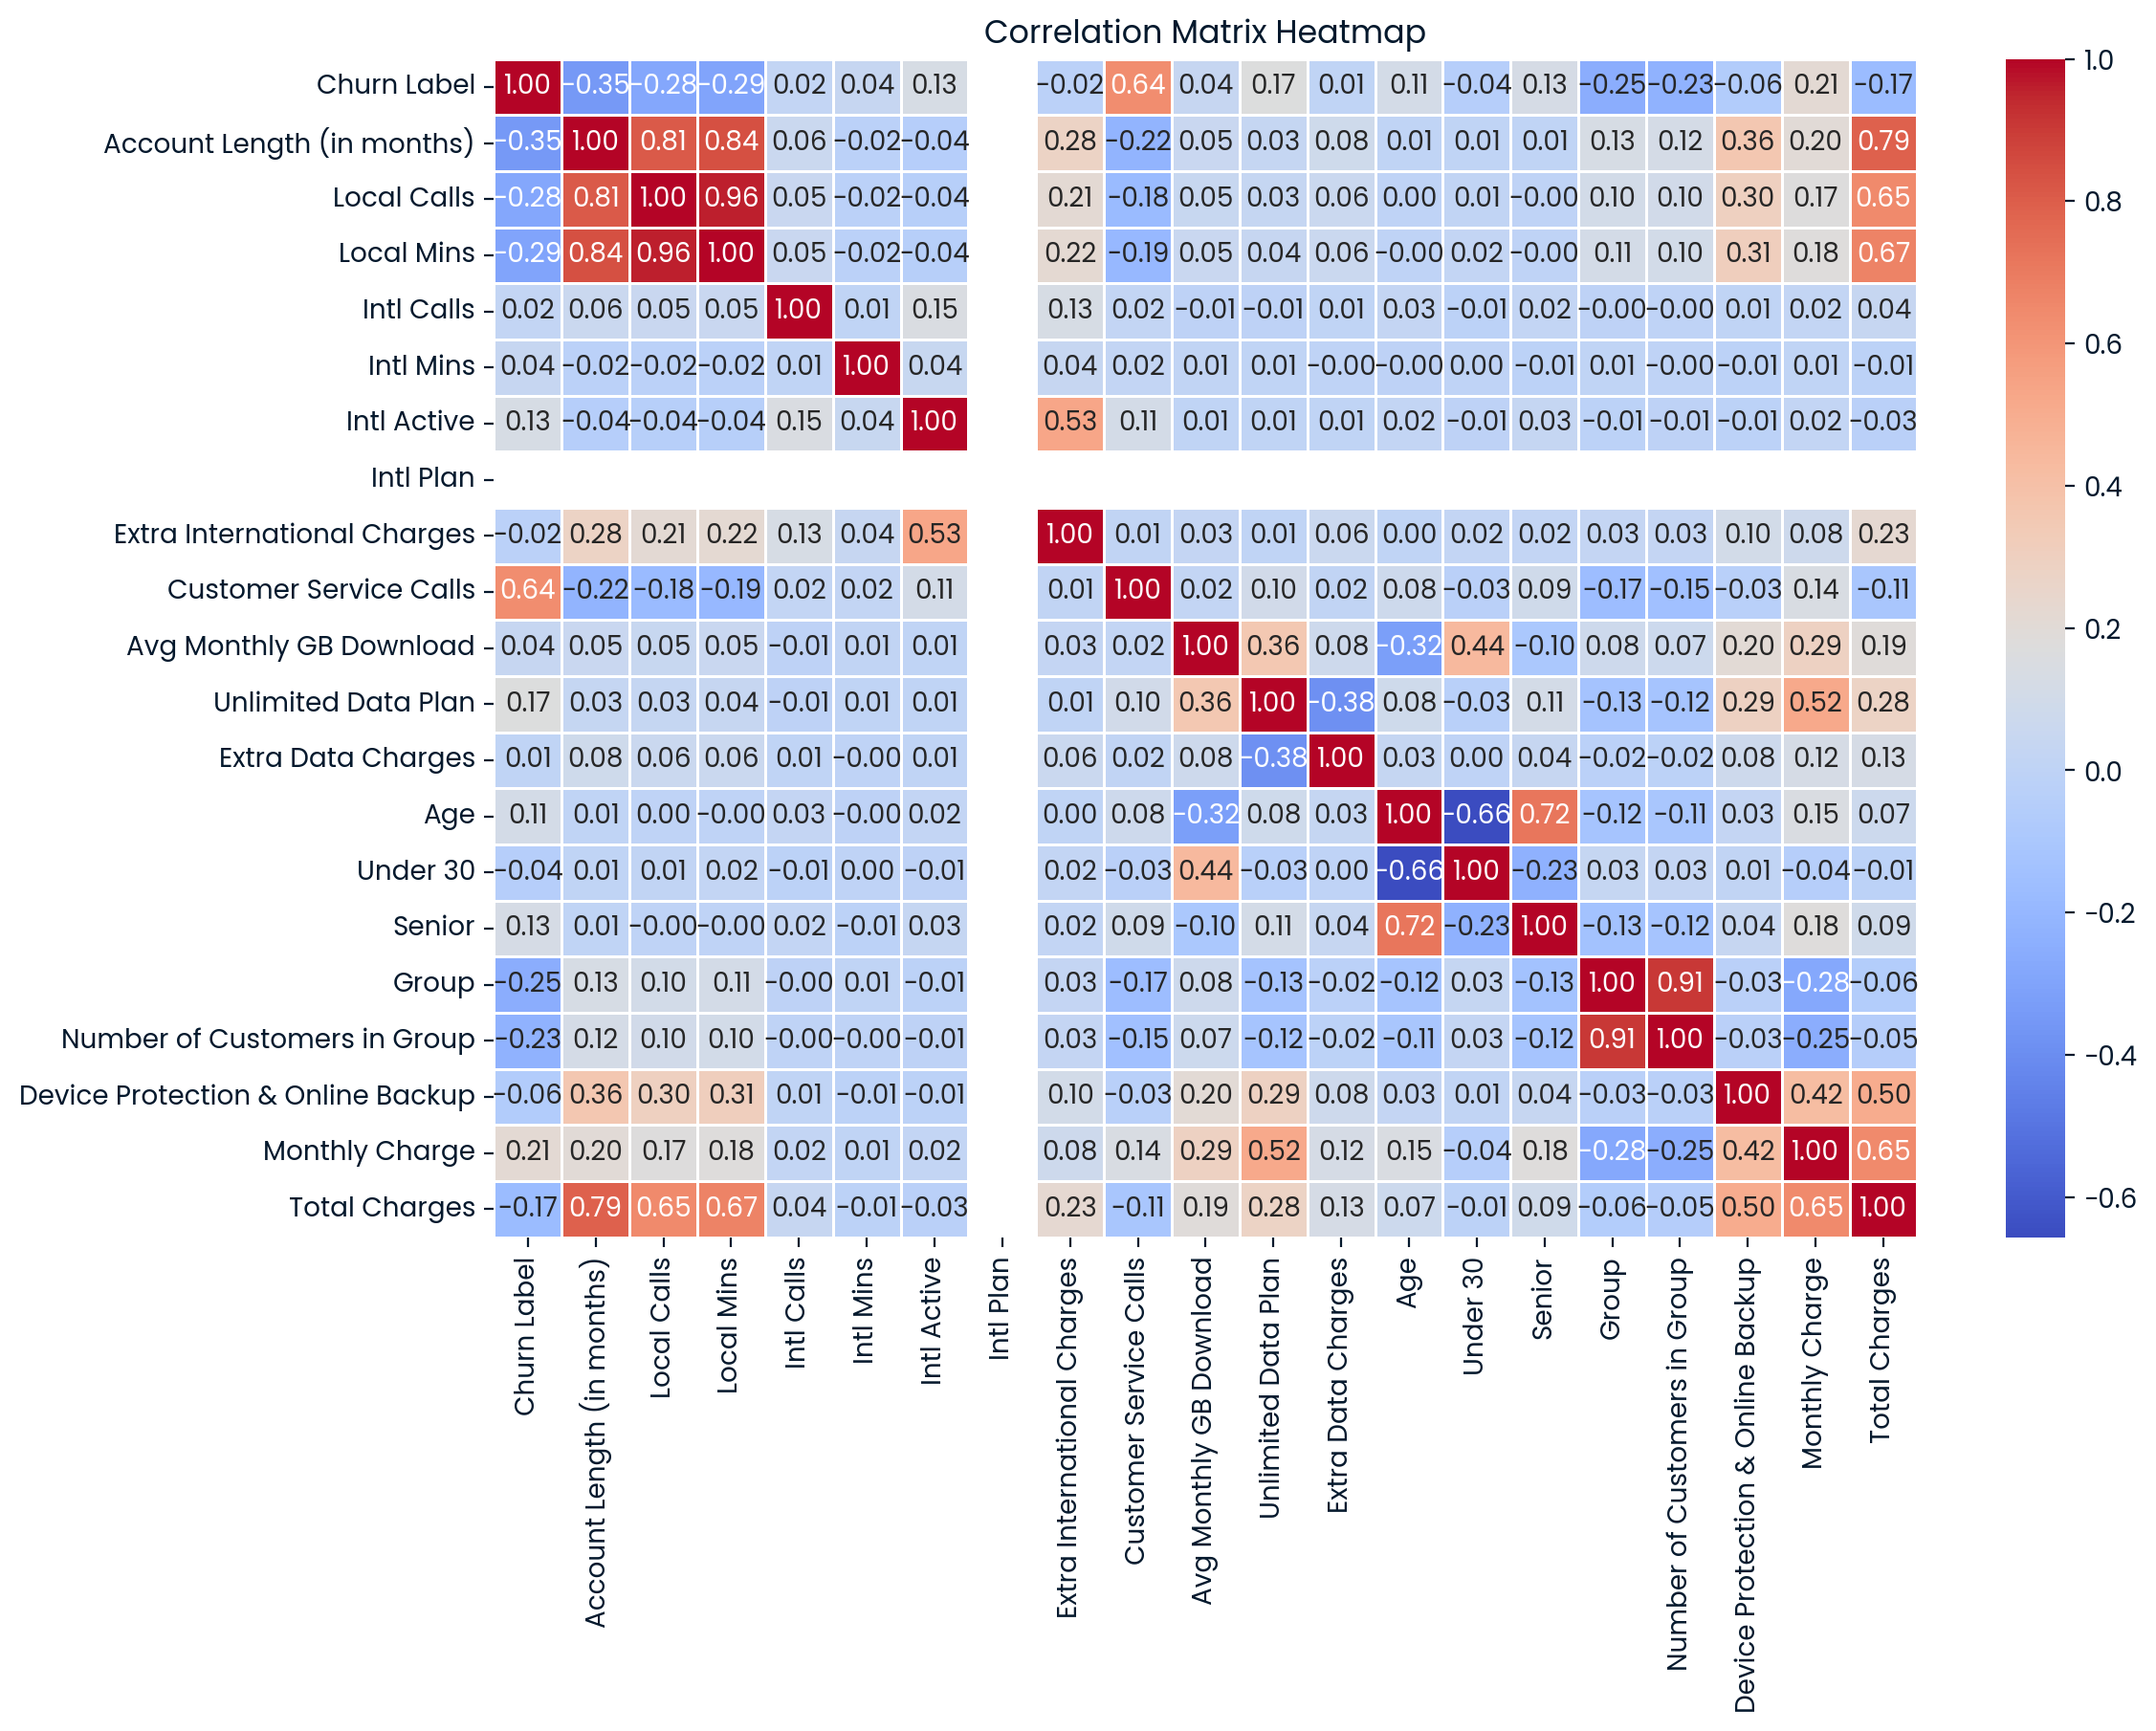

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, let's identify and remove non-numeric columns from the DataFrame
numeric_df = Databel_ml.select_dtypes(include=[float, int])

# Now we can safely compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
#splitting the data into target variable and workinf variable
X=Databel_ml.drop(columns='Churn Label')
y=Databel_ml['Churn Label']
X.head()

,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,Customer Service Calls,Avg Monthly GB Download,Unlimited Data Plan,Extra Data Charges,State,Gender,Age,Under 30,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges
0,1,3,8.0,0.0,0.0,0,0,0.0,0,3,1,0,KS,Female,35,0,0,0,0,0,Month-to-Month,Direct Debit,10,10
1,33,179,431.3,0.0,0.0,0,0,0.0,0,3,1,0,OH,Male,49,0,0,0,0,1,One Year,Paper Check,21,703
2,44,82,217.6,0.0,0.0,0,0,0.0,0,3,1,0,OH,Male,51,0,0,0,0,1,One Year,Direct Debit,23,1014
3,10,47,111.6,60.0,71.0,1,0,0.0,0,2,1,0,MO,Female,41,0,0,0,0,0,Month-to-Month,Paper Check,17,177
4,62,184,621.2,310.0,694.4,1,0,0.0,0,3,1,0,WV,Male,51,0,0,0,0,0,One Year,Direct Debit,28,1720


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Account Length (in months)         6687 non-null   int64  
 1   Local Calls                        6687 non-null   int64  
 2   Local Mins                         6687 non-null   float64
 3   Intl Calls                         6687 non-null   float64
 4   Intl Mins                          6687 non-null   float64
 5   Intl Active                        6687 non-null   int64  
 6   Intl Plan                          6687 non-null   int64  
 7   Extra International Charges        6687 non-null   float64
 8   Customer Service Calls             6687 non-null   int64  
 9   Avg Monthly GB Download            6687 non-null   int64  
 10  Unlimited Data Plan                6687 non-null   int64  
 11  Extra Data Charges                 6687 non-null   int64

In [17]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)


In [22]:
##Evaluating with a simple decision tree classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import TruncatedSVD

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'model__max_depth': [10, 20, 30, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__criterion': ['entropy', 'gini']  
}

numeric_features = []

for column in X.select_dtypes(exclude='O').columns.tolist():
    if X[column].nunique() > 2:
        numeric_features.append(column)

categorical_features = X.select_dtypes(include='O').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(with_mean=False), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', DecisionTreeClassifier(random_state=42))
])

# Initialize GridSearchCV with the pipeline
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import accuracy_score

# Extract the best estimator
best_model = grid_search.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
accuracy_dtc = accuracy_score(y_test, y_pred)

# Print rmse_test
print('Test accuracy of best model: {:.3f}'.format(accuracy_dtc))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Test accuracy of best model: 0.871


In [23]:
#using bagging tree 0.359

In [24]:
##Evaluating with a simple decision tree classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import TruncatedSVD

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'model__max_depth': [10, 20, 30, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__criterion': ['entropy', 'gini']  # Fixed the parameter name here
}

numeric_features = []

for column in X.select_dtypes(exclude='O').columns.tolist():
    if X[column].nunique() > 2:
        numeric_features.append(column)

categorical_features = X.select_dtypes(include='O').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(with_mean=False), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', DecisionTreeClassifier(random_state=42))
])

# Define the number of iterations for RandomizedSearchCV
n_iter = 30  # You can adjust this number as needed

# Initialize RandomizedSearchCV with the pipeline
randomized_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, scoring='accuracy',
                       cv=3,
                       verbose=1, n_iter=n_iter,
                       n_jobs=-1)

# Fit the RandomizedSearchCV
randomized_search.fit(X_train, y_train)

# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import accuracy_score

# Extract the best estimator
best_model = randomized_search.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
accuracy_dtc_r = accuracy_score(y_test, y_pred)

# Print rmse_test
print('Test accuracy of best model: {:.3f}'.format(accuracy_dtc_r))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Test accuracy of best model: 0.867


In [25]:
#using random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# Define the parameter grid to tune the hyperparameters for RandomForestClassifier
param_grid = {
    'model__n_estimators': [100, 200, 300, 500],
    'model__max_depth': [10, 20, 30, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__criterion': ['entropy', 'gini']
}

# Separate numeric and categorical features
numeric_features = [column for column in X.select_dtypes(exclude='O').columns if X[column].nunique() > 2]
categorical_features = X.select_dtypes(include='O').columns.tolist()

# Preprocessor for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(with_mean=False), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create the pipeline with RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Define the number of iterations for RandomizedSearchCV
n_iter = 30  # Adjust as needed

# Initialize RandomizedSearchCV with the pipeline
randomized_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    scoring='accuracy',  # Using accuracy as evaluation metric
    cv=3,
    verbose=1,
    n_iter=n_iter,
    n_jobs=-1
)

# Fit RandomizedSearchCV on the training data
randomized_search.fit(X_train, y_train)

# Extract the best estimator
best_model = randomized_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Compute and print accuracy score on the test set
accuracy_rfc = accuracy_score(y_test, y_pred)
print('Test Accuracy of best model: {:.3f}'.format(accuracy_rfc))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Test Accuracy of best model: 0.897


In [26]:
#using the gradient boostin classifier
from sklearn.ensemble import GradientBoostingClassifier


# Define the parameter grid correctly with string keys
params_grid = {
    'model__max_depth': [2, 3, 4, 5, 6], 
    'model__subsample': [0.5, 0.6, 0.7, 0.75, 0.85, 0.9],
    'model__max_features': [0.75, 0.8, 0.9],
    'model__n_estimators': [50, 100, 150, 200]
}

# Separate numeric and categorical features
numeric_features = [column for column in X.select_dtypes(exclude='O').columns if X[column].nunique() > 2]
categorical_features = X.select_dtypes(include='O').columns.tolist()

# Preprocessor for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(with_mean=False), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create the pipeline with GradientBoostingClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Define the number of iterations for RandomizedSearchCV
n_iter = 30  # Adjust as needed

# Initialize RandomizedSearchCV with the pipeline
randomized_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=params_grid,
    scoring='accuracy',  # Using accuracy as evaluation metric
    cv=3,
    verbose=1,
    n_iter=n_iter,
    n_jobs=-1
)

# Fit RandomizedSearchCV on the training data
randomized_search.fit(X_train, y_train)

# Extract the best estimator
best_model = randomized_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Compute and print accuracy score on the test set
accuracy_gbc = accuracy_score(y_test, y_pred)
print('Test Accuracy of best model: {:.3f}'.format(accuracy_gbc))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Test Accuracy of best model: 0.898


In [40]:
#using support vector classifier

from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import TruncatedSVD

params_grid = {'model__C':[0.1, 1, 10], 
               'model__gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1],
               'model__kernel':['linear', 'poly', 'rbf', 'sigmoid']}

# Separate numeric and categorical features
numeric_features = [column for column in X.select_dtypes(exclude='O').columns if X[column].nunique() > 2]
categorical_features = X.select_dtypes(include='O').columns.tolist()

# Preprocessor for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(with_mean=False), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create the pipeline with SVC
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVC(random_state=42))
])

# Define the number of iterations for RandomizedSearchCV
n_iter = 30  # Adjust as needed

# Initialize RandomizedSearchCV with the pipeline
randomized_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=params_grid,
    scoring='accuracy',  # Using accuracy as evaluation metric
    cv=3,
    verbose=1,
    n_iter=n_iter,
    n_jobs=-1
)

# Fit RandomizedSearchCV on the training data
randomized_search.fit(X_train, y_train)

# Extract the best estimator
best_model = randomized_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Compute and print accuracy score on the test set
accuracy_svm = accuracy_score(y_test, y_pred)
print('Test Accuracy of best model: {:.3f}'.format(accuracy_svm))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Test Accuracy of best model: 0.868
